In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# pd.set_option('display.max_rows', None)
df = pd.read_csv('./stats.csv')

In [50]:
df

,port,duration,pkt_size,rate,mbps,mpps,loss
0,0,60,64,1.0,179.4201,0.3738,0.0009
1,1,60,64,1.0,179.4185,0.3738,0.0019
2,2,60,64,1.0,179.4223,0.3738,0.0000
3,3,60,64,1.0,179.4177,0.3738,0.0025
4,0,60,64,2.0,352.8393,0.7351,0.0059
...,...,...,...,...,...,...,...
903,3,60,1024,99.0,24236.3905,2.9701,0.0546
904,0,60,1024,100.0,18402.6714,2.2552,23.5491
905,1,60,1024,100.0,19969.6496,2.4473,17.0266
906,2,60,1024,100.0,24051.4269,2.9475,0.0830


In [51]:
df.columns = df.columns.str.replace(' ','')
df = df.drop(['duration','rate','mbps'], axis=1)
df = df.sort_values(by=['pkt_size','port'],ignore_index=True)

In [52]:
def transfrm(x):
    if (x == 0 or x == 1):
        return 'ARM'
    else:
        return 'Intel'

In [53]:
df['port'] = df['port'].apply(transfrm)
df

,port,pkt_size,mpps,loss
0,ARM,64,0.3738,0.0009
1,ARM,64,0.7351,0.0059
2,ARM,64,1.1210,0.0300
3,ARM,64,1.4943,0.0440
4,ARM,64,1.8245,0.1199
...,...,...,...,...
903,Intel,1024,2.8804,0.0703
904,Intel,1024,2.8612,0.0387
905,Intel,1024,2.9380,0.0771
906,Intel,1024,2.9701,0.0546


In [54]:
is_low_loss = df['loss']<=0.1
df_low_loss = df[is_low_loss]
df_low_loss

,port,pkt_size,mpps,loss
0,ARM,64,0.3738,0.0009
1,ARM,64,0.7351,0.0059
2,ARM,64,1.1210,0.0300
3,ARM,64,1.4943,0.0440
13,ARM,64,0.3738,0.0019
...,...,...,...,...
903,Intel,1024,2.8804,0.0703
904,Intel,1024,2.8612,0.0387
905,Intel,1024,2.9380,0.0771
906,Intel,1024,2.9701,0.0546


In [55]:
df_low_loss.groupby(['port','pkt_size']).mean()
df_low_loss

,port,pkt_size,mpps,loss
0,ARM,64,0.3738,0.0009
1,ARM,64,0.7351,0.0059
2,ARM,64,1.1210,0.0300
3,ARM,64,1.4943,0.0440
13,ARM,64,0.3738,0.0019
...,...,...,...,...
903,Intel,1024,2.8804,0.0703
904,Intel,1024,2.8612,0.0387
905,Intel,1024,2.9380,0.0771
906,Intel,1024,2.9701,0.0546


In [56]:
df_low_loss = df_low_loss.drop(['loss'], axis=1)
df_low_loss

,port,pkt_size,mpps
0,ARM,64,0.3738
1,ARM,64,0.7351
2,ARM,64,1.1210
3,ARM,64,1.4943
13,ARM,64,0.3738
...,...,...,...
903,Intel,1024,2.8804
904,Intel,1024,2.8612
905,Intel,1024,2.9380
906,Intel,1024,2.9701


In [57]:
perf = df_low_loss.pivot_table(index='pkt_size',values='mpps', columns='port',)
perf

port,ARM,Intel
pkt_size,,
64,1.030289,2.314239
128,0.987606,2.130616
256,0.972634,1.810010
512,0.867133,1.746232
1024,0.758439,1.504450


<Figure size 480x360 with 0 Axes>

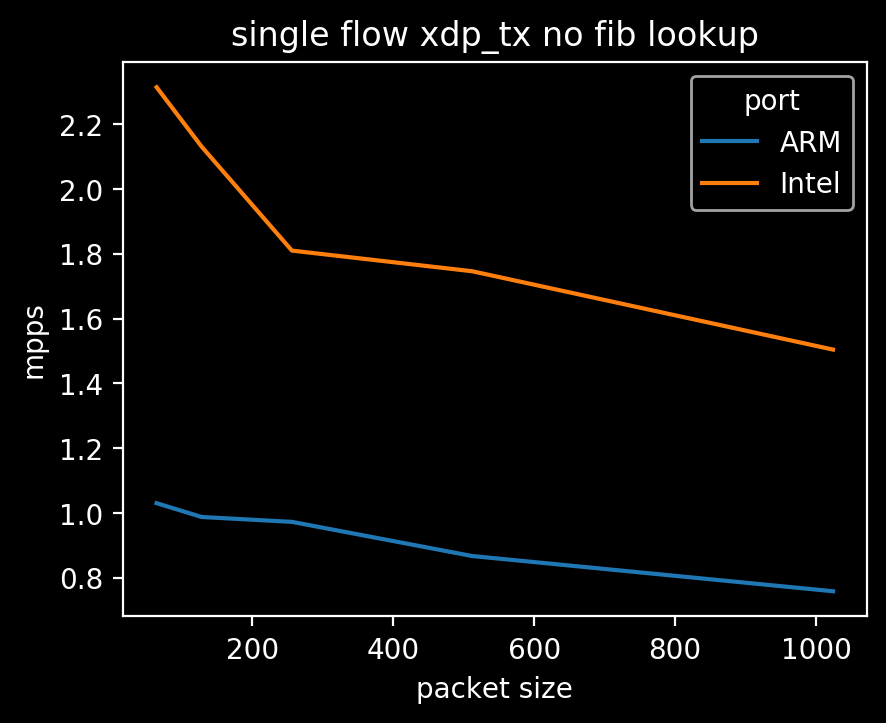

In [58]:
f = plt.figure()
ax = perf.plot(title='single flow xdp_tx no fib lookup')
ax.set_xlabel('packet size')
ax.set_ylabel('mpps')
plt.show()

In [59]:
perf

port,ARM,Intel
pkt_size,,
64,1.030289,2.314239
128,0.987606,2.130616
256,0.972634,1.810010
512,0.867133,1.746232
1024,0.758439,1.504450


In [60]:
mpps_per_watt = perf
mpps_per_watt['ARM'] = mpps_per_watt['ARM'].div(1.6876)
mpps_per_watt['Intel'] = mpps_per_watt['Intel'].div(6.875)
mpps_per_watt

port,ARM,Intel
pkt_size,,
64,0.610505,0.336617
128,0.585213,0.309908
256,0.576342,0.263274
512,0.513826,0.253997
1024,0.449419,0.218829


<Figure size 480x360 with 0 Axes>

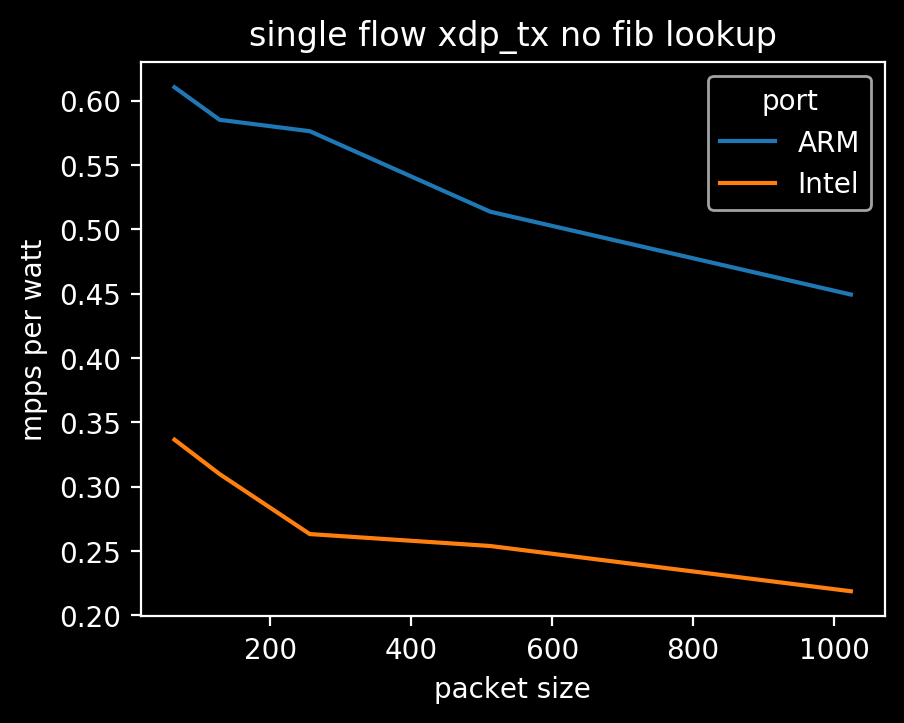

In [61]:
f = plt.figure()
ax = perf.plot(title='single flow xdp_tx no fib lookup')
ax.set_xlabel('packet size')
ax.set_ylabel('mpps per watt')
plt.show()